In [14]:
import torch
import copy
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

In [15]:
def rosenbrock(X):
    x = X[0]
    y = X[1]
    a = 1. - x
    b = y - x*x
    return a*a + b*b*100  

## a) Visualization of an Unconstrained Optimization

### 1. Visualize the Rosenbrock function 

C:\Users\HUSSEI~1\AppData\Local\Temp/ipykernel_16012/759188661.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


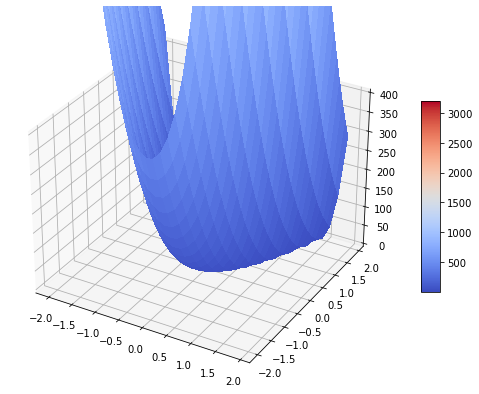

In [16]:
fig = plt.figure(figsize=(12, 7))
ax = fig.gca(projection='3d')

# Evaluate function
X = np.arange(-2, 2, 0.15)
Y = np.arange(-2, 2, 0.15)
X, Y = np.meshgrid(X, Y)
Z = rosenbrock((X,Y))

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)



ax.set_zlim(0, 400)
fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()

### 2. Implement a function optimize

In [17]:
def optimize(param,optimizer,lower_bound):
    steps=[]
    while True:
        params.requires_grad_()
        optimizer.zero_grad()
        loss = rosenbrock(params)
        loss.backward()
        with torch.no_grad():
            steps.append(copy.deepcopy(params.tolist()))
        if(loss.item()<=lower_bound):
            break
        grad = params.grad.data
        optimizer.step()
    return steps

In [18]:
def visualize_path(result):
    evolution_X1 = np.array(result)[:,0]
    evolution_X2 = np.array(result)[:,1]
    x1 = np.arange(-2, 2, 0.1)
    x2 = np.arange(-2, 2, 0.1)
    X1, X2 = np.meshgrid(x1, x2)
    Z = rosenbrock((X1,X2))
    fig = plt.figure(figsize = (10,7))

    plt.imshow(Z, origin = 'lower', extent = [-2,2,-2,2], alpha = 1)
    plt.plot(evolution_X1, evolution_X2)
    plt.colorbar()

    plt.show()

In [19]:
params = torch.tensor([-1.5,1.5])
l=0.001

### 3. Visualize the path the parameter took to reach a local minimum

#### 3.1 without momentum


In [20]:
optimizer = torch.optim.SGD([params], lr=0.01)
result=optimize(params,optimizer,l)
visualize_path(result=result)

#### 3.1 wit momentum


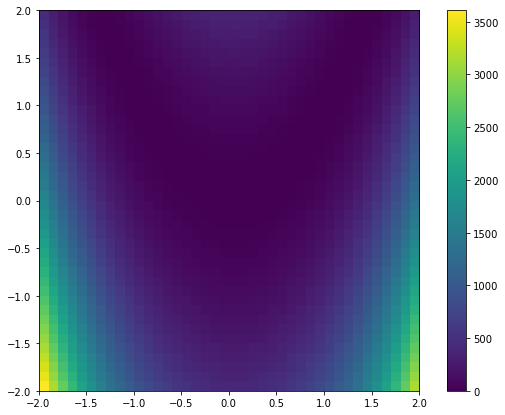

In [ ]:
optimizer = torch.optim.SGD([params], lr=0.01,momentum=0.9)
result=optimize(params,optimizer,l)
visualize_path(result=result)

#### with NAG momentum


In [ ]:
  
optimizer = torch.optim.SGD([params], lr=0.01,momentum=0.9,nesterov=True)
result=optimize(params,optimizer,l)
visualize_path(result=result)


ValueError: Nesterov momentum requires a momentum and zero dampening